In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sklearn

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [3]:
#%matplotlib notebook

# Quarter

In [4]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
xx, yy = np.meshgrid(x, y)

In [5]:
def quarter(x, y):
    z = (x > 0) & (y < 0)
    return z

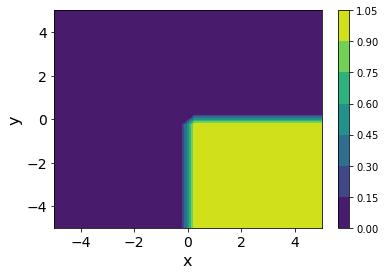

In [6]:
plt.contourf(xx, yy, quarter(xx, yy))
plt.colorbar()
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Learn

In [7]:
X = np.vstack((xx.flatten(), yy.flatten())).transpose()
X.shape

(400, 2)

In [8]:
z = quarter(xx, yy).flatten()
z.shape

(400,)

In [9]:
kernel = RBF(length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel)


In [69]:
def make_animation(X, xx, yy, z, gpr):

    index = np.arange(len(z))
    np.random.shuffle(index)

    n_step = 20

    def update(step):

        n_samples = int(step * len(z) / n_step)

        X_ = X[index[:n_samples]]
        z_ = z[index[:n_samples]]

        gpr.fit(X_, z_)
        z_predict, z_std = gpr.predict(X, return_std=True)
        
        plt.clf()
        plt.title(f"Step: {step}/{n_step}")

        plt.subplot(2, 2, 1)
        plt.title("Prediction")
        plt.contourf(xx, yy, z_predict.reshape(*xx.shape))
        plt.colorbar()

        plt.subplot(2, 2, 2)
        plt.title("Training Data")
        plt.scatter(X_[:, 0], X_[:, 1], c=z_)
        plt.colorbar()
        
        plt.subplot(2, 2, 3)
        plt.title("Uncertainty")
        plt.contourf(xx, yy, z_std.reshape(*xx.shape))
        plt.colorbar()
        
        plt.subplot(2, 2, 4)
        plt.title("Error: predic-act")
        plt.contourf(xx, yy, (z_predict-z).reshape(*xx.shape))
        plt.colorbar()
        
        plt.tight_layout()

        
        


    fig = plt.figure(figsize=(8, 8))

    anim = FuncAnimation(
        fig, 
        update, 
        frames=np.arange(1, n_step+1),
        #init_func=init,
        interval=2e3,
        repeat=True,
        repeat_delay=3e3,
    )
    #plt.show()
    
    return anim


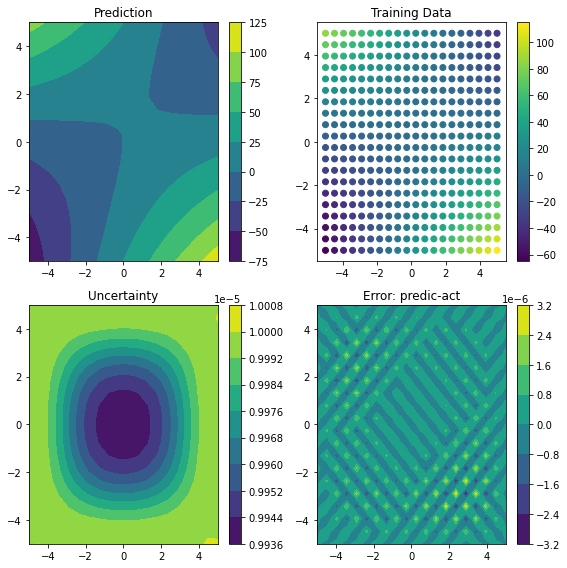

In [70]:
anim = make_animation(X, xx, yy, z, gpr);

from IPython.display import HTML
HTML(anim.to_jshtml())

# Half 

In [71]:
def half(x, y):
    z = (x > 0)
    return z

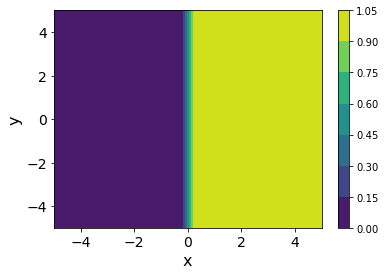

In [72]:
plt.contourf(xx, yy, half(xx, yy))
plt.colorbar()
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Learn

In [73]:
X = np.vstack((xx.flatten(), yy.flatten())).transpose()
X.shape

(400, 2)

In [74]:
z = half(xx, yy).flatten()
z.shape

(400,)

In [75]:
kernel = RBF(length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel)


/home/jcartus/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2663: RuntimeWarning: divide by zero encountered in double_scalars
  y_scale = 1.0 / inh
/home/jcartus/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2665: RuntimeWarning: invalid value encountered in double_scalars
  [0.0    , y_scale, (-inb*y_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/home/jcartus/anaconda3/lib/python3.7/site-pa

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/jcartus/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2663: RuntimeWarning: divide by zero encountered in double_scalars
  y_scale = 1.0 / inh
/home/jcartus/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2665: RuntimeWarning: invalid value encountered in double_scalars
  [0.0    , y_scale, (-inb*y_scale)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


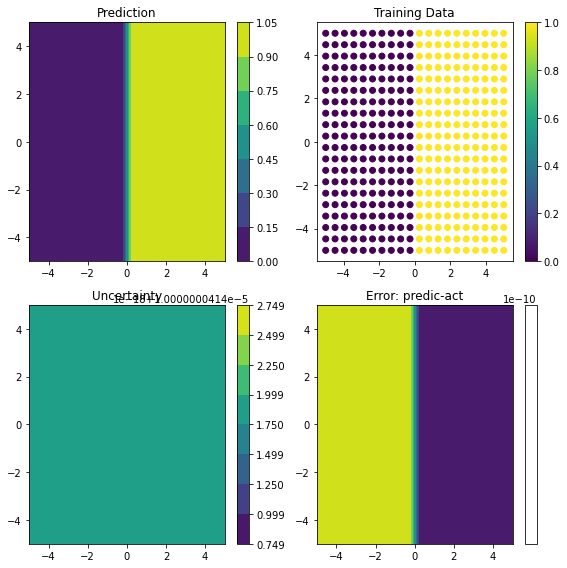

In [76]:
anim = make_animation(X, xx, yy, z, gpr);

from IPython.display import HTML
HTML(anim.to_jshtml())

# Fancy Surface

In [13]:
def fancy(x, y):
    z = 3*x + y**2 - 3*x*y
    return z

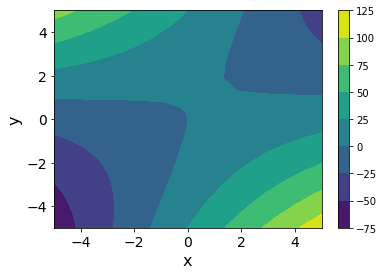

In [14]:
plt.contourf(xx, yy, fancy(xx, yy))
plt.colorbar()
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Learn

In [60]:
X = np.vstack((xx.flatten(), yy.flatten())).transpose()
X.shape

(400, 2)

In [61]:
z = fancy(xx, yy).flatten()
z.shape

(400,)

In [62]:
kernel = RBF(length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel)


/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


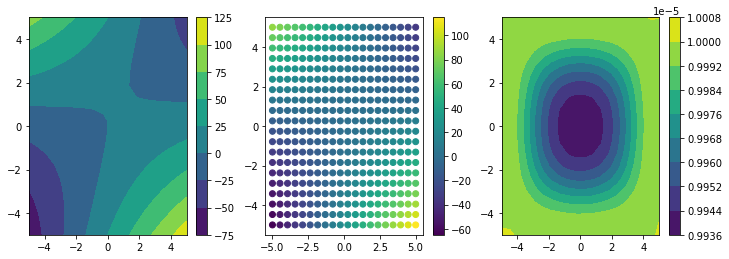

In [63]:
anim = make_animation(X, xx, yy, z, gpr);

from IPython.display import HTML
HTML(anim.to_jshtml())